In [1]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

In [5]:
SIZE = 40

#dibujo de un pez
fish = np.array([[0, 0, 0, 0, 0],
                 [0, 1, 1, 1, 0],
                 [0, 1, 1, 1, 0],
                 [0, 1, 1, 1, 1],
                 [0, 0, 0, 1, 0]])

# make a simple matrix with some "fish"
fish_tank = np.zeros((SIZE, SIZE))


# add seafloor (unos en el fondo, ceros en otros lugares)
fish_tank[SIZE - 1, :] = 1
fish_tank[SIZE - 2, :] = 1
fish_tank[SIZE - 3, :] = 1
fish_tank[SIZE - 4, :] = 1

# add random fish to the tank
for i in range(0, SIZE - 5, 5):
    for j in range(0, SIZE - 5, 5):
        if np.random.random() > 0.95:
            fish_tank[i : i + 5, j : j + 5] = fish

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [3]:
# make a convolve with fish kernel to find the fish
#fish_kernel = (fish-0.5)*2
fish_kernel = np.array([[-1, 1, -1, -1], [1, 1, 1, 1], [-1, 1, 1, 1], [-1, 1, 1, 1]]) #filtro de 4x4 que va a ser como el filtro del pez con -1 donde hay agua
fish_kernel = fish_kernel/np.sum(fish_kernel>0) #cuento cuantos 1 hay y divido por la cantidad de 1 para normalizar
fish_conv = convolve2d(fish_tank, fish_kernel, mode="same") #same es el pading (repetir el ultimo valor)

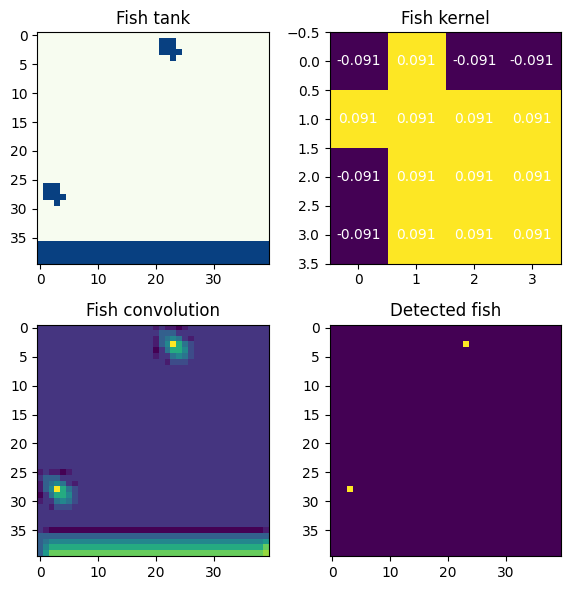

In [4]:
# plot the results
plt.figure(figsize=(6, 6))
plt.subplot(221)
plt.title("Fish tank")
plt.imshow(fish_tank, cmap="GnBu")

plt.subplot(222)
plt.title("Fish kernel")
plt.imshow(fish_kernel)
for i in range(fish_kernel.shape[0]):
    for j in range(fish_kernel.shape[1]):
        plt.text(i, j, f"{fish_kernel[i, j]:4.2}", ha="center", va="center", color="w")

plt.subplot(223)
plt.title("Fish convolution")
plt.imshow(fish_conv)

plt.subplot(224)
plt.title("Detected fish")
plt.imshow(fish_conv > 0.99)

plt.tight_layout()
plt.show()